In [1]:
# ex1 - employee learnings

In [2]:
# load libraries
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# load data from github
df = pd.read_csv("https://raw.githubusercontent.com/redurne/bdata-talentanalytics/main/ex1/dataset/employees_attrition.csv")
df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


## Understanding data

In [3]:
# Dimensions (columns, rows)
df.shape

(49653, 18)

In [4]:
# Checking Null Values
df.isnull().sum()

EmployeeID             0
recorddate_key         0
birthdate_key          0
orighiredate_key       0
terminationdate_key    0
age                    0
length_of_service      0
city_name              0
department_name        0
job_title              0
store_name             0
gender_short           0
gender_full            0
termreason_desc        0
termtype_desc          0
STATUS_YEAR            0
STATUS                 0
BUSINESS_UNIT          0
dtype: int64

In [5]:
# Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

In [6]:
# Checking duplicates
df.drop_duplicates(inplace=True)
df

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES


In [7]:
# Dropping Some Unimportant Columns
df.drop(['birthdate_key', 'recorddate_key', 'gender_full'], axis=1, inplace=True)

In [8]:
df.head()

,EmployeeID,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [9]:
# Unique values in City Names
df.city_name.unique()

array(['Vancouver', 'Terrace', 'Nanaimo', 'Nelson', 'Kelowna', 'Victoria',
       'Kamloops', 'Fort St John', 'Surrey', 'Vernon', 'Quesnel',
       'Chilliwack', 'Dawson Creek', 'Squamish', 'New Westminster',
       'Port Coquitlam', 'Cortes Island', 'Burnaby', 'Bella Bella',
       'Cranbrook', 'Williams Lake', 'Trail', 'Prince George', 'Richmond',
       'Grand Forks', 'West Vancouver', 'Abbotsford', 'Aldergrove',
       'Langley', 'North Vancouver', 'White Rock', 'New Westminister',
       'Fort Nelson', 'Haney', 'Valemount', 'Ocean Falls', 'Princeton',
       'Dease Lake', 'Pitt Meadows', 'Blue River'], dtype=object)

In [10]:
# TODO Unique values in Department name


In [11]:
# TODO Unique values in Termination Reason Description


In [12]:
# TODO Unique values in the Business Unit


In [13]:
# TODO Unique values in job title


In [14]:
# TODO Unique values in termtype_desc  


In [15]:
# Convert job titles into 4 categories
board = ['CEO','VP Stores', 'Director, Recruitment', 'VP Human Resources', 'VP Finance', 'Director, Accounts Receivable', 
         'Director, Accounting', 'Director, Employee Records', 'Director, Accounts Payable', 'Director, HR Technology', 
         'Director, Investments', 'Director, Labor Relations', 'Director, Audit', 'Director, Training',
         'Director, Compensation']

executive = [ 'Exec Assistant, VP Stores', 'Exec Assistant, Legal Counsel', 'CHief Information Officer', 
             'Exec Assistant, Human Resources', 'Exec Assistant, Finance']

manager = ['Customer Service Manager', 'Processed Foods Manager', 'Meats Manager',
           'Bakery Manager', 'Produce Manager', 'Store Manager', 'Trainer', 'Dairy Manager']

employee = ['Meat Cutter', 'Dairy Person', 'Produce Clerk', 'Baker', 'Cashier',
            'Shelf Stocker', 'Recruiter', 'HRIS Analyst', 'Accounting Clerk',
            'Benefits Admin', 'Labor Relations Analyst', 'Accounts Receiveable Clerk',
            'Accounts Payable Clerk', 'Auditor', 'Compensation Analyst',
            'Investment Analyst', 'Systems Analyst', 'Corporate Lawyer', 'Legal Counsel']
def job_title(job):
    if job in board: return 'board'
    if job in executive: return 'executive'
    if job in manager: return 'manager'
    if job in employee: return 'employee'

df['job_title'] = df['job_title'].map(job_title)

In [16]:
df.head()

,EmployeeID,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,8/28/1989,1/1/1900,52,17,Vancouver,Executive,board,35,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,8/28/1989,1/1/1900,53,18,Vancouver,Executive,board,35,M,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,8/28/1989,1/1/1900,54,19,Vancouver,Executive,board,35,M,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,8/28/1989,1/1/1900,55,20,Vancouver,Executive,board,35,M,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,8/28/1989,1/1/1900,56,21,Vancouver,Executive,board,35,M,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [17]:
# Changing the city names of number of habitants
city_population = {
    'Vancouver':2313328,
     'Victoria':289625,
     'Nanaimo':84905,
     'New Westminster':58549,
     'Kelowna':125109,
     'Burnaby':202799,
     'Kamloops':68714,
     'Prince George':65558,
     'Cranbrook':18610,
     'Surrey':394976,
     'Richmond':182000,
     'Terrace':19443,
     'Chilliwack':77000,
     'Trail':9707,
     'Langley':23606,
     'Vernon':47274,
     'Squamish':19512,
     'Quesnel':13799,
     'Abbotsford':151683,
     'North Vancouver':48000,
     'Fort St John':17402,
     'Williams Lake':14168,
     'West Vancouver':42694,
     'Port Coquitlam':114565,  
     'Aldergrove':12363,
     'Fort Nelson':3561,
     'Nelson':9813,
     'New Westminister':58549,
     'Grand Forks':4049,
     'White Rock':66450,
     'Haney':82256,
     'Princeton':2828,
     'Dawson Creek':10802,
     'Bella Bella':1019,
     'Ocean Falls':129,
     'Pitt Meadows':174410,
     'Cortes Island':1042,
     'Valemount':1021,
     'Dease Lake':335,
     'Blue River':157
}
def change_city_into_city_pop(city):
    return city_population(city)

df['city_name'] = df['city_name'].map(city_population)

In [18]:
df.head()

,EmployeeID,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,8/28/1989,1/1/1900,52,17,2313328,Executive,board,35,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,8/28/1989,1/1/1900,53,18,2313328,Executive,board,35,M,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,8/28/1989,1/1/1900,54,19,2313328,Executive,board,35,M,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,8/28/1989,1/1/1900,55,20,2313328,Executive,board,35,M,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,8/28/1989,1/1/1900,56,21,2313328,Executive,board,35,M,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [19]:
# Changing number of habitants into terms (rural, town, mega)
def change_city(population):
    str = 'rural'
    if (population >= 10000) & (population < 100000): str = 'town'
    if population >= 100000: str = 'mega'
    return str

df['city_name'] = df.city_name.map(change_city)

In [20]:
# TODO Unique values in city_name

In [21]:
df.head()

,EmployeeID,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,8/28/1989,1/1/1900,52,17,mega,Executive,board,35,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,8/28/1989,1/1/1900,53,18,mega,Executive,board,35,M,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,8/28/1989,1/1/1900,54,19,mega,Executive,board,35,M,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,8/28/1989,1/1/1900,55,20,mega,Executive,board,35,M,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,8/28/1989,1/1/1900,56,21,mega,Executive,board,35,M,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


## Data viz

In [22]:
# Counts per Status
df.STATUS.value_counts()

ACTIVE        48168
TERMINATED     1485
Name: STATUS, dtype: int64

Text(0, 0.5, 'Count')

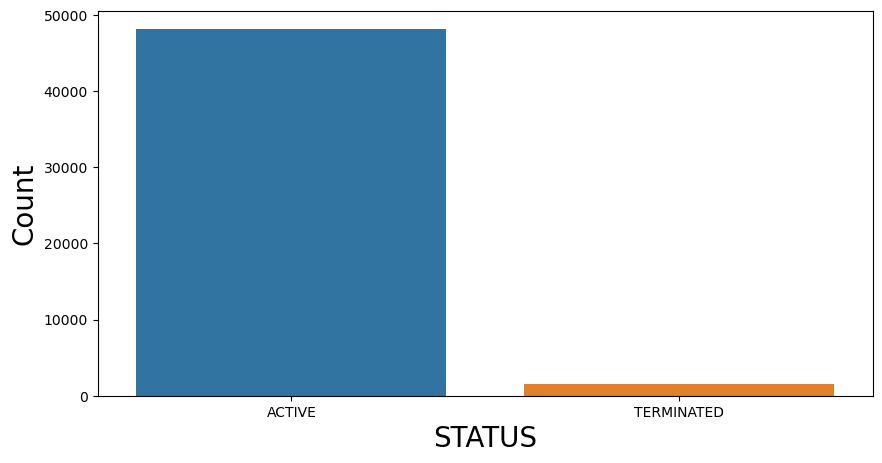

In [23]:
status_label = df.STATUS.value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=status_label.index, y=status_label)
plt.xlabel('STATUS', fontsize=20)
plt.ylabel('Count', fontsize=20)

In [24]:
# Balance

from sklearn.utils import resample

# Separate Target Classes
df_1 = df[df.STATUS=="ACTIVE"]
df_2 = df[df.STATUS=="TERMINATED"]
 
# Upsample minority class
df_2_upsampled = resample(df_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=48168,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_1, df_2_upsampled])
 
# Display new class counts
df_upsampled.STATUS.value_counts()

ACTIVE        48168
TERMINATED    48168
Name: STATUS, dtype: int64

In [25]:
df_upsampled

,EmployeeID,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,8/28/1989,1/1/1900,52,17,mega,Executive,board,35,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,8/28/1989,1/1/1900,53,18,mega,Executive,board,35,M,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,8/28/1989,1/1/1900,54,19,mega,Executive,board,35,M,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,8/28/1989,1/1/1900,55,20,mega,Executive,board,35,M,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,8/28/1989,1/1/1900,56,21,mega,Executive,board,35,M,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48938,4480,8/8/1998,1/31/2007,60,8,town,Produce,employee,18,M,Retirement,Voluntary,2007,TERMINATED,STORES
48796,4057,6/1/1997,11/24/2010,65,13,town,Meats,employee,28,F,Retirement,Voluntary,2010,TERMINATED,STORES
49456,7207,5/19/2009,11/12/2012,26,3,town,Processed Foods,employee,21,F,Resignaton,Voluntary,2012,TERMINATED,STORES
49046,4752,6/23/1999,12/16/2007,60,8,mega,Meats,employee,35,M,Retirement,Voluntary,2007,TERMINATED,STORES


Text(0, 0.5, 'Count')

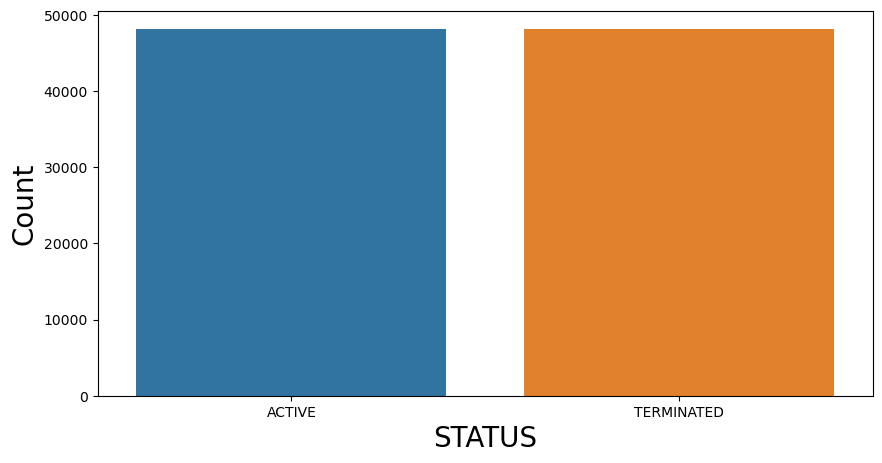

In [26]:
status_label = df_upsampled.STATUS.value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=status_label.index, y=status_label)
plt.xlabel('STATUS', fontsize=20);
plt.ylabel('Count', fontsize=20)

<Axes: xlabel='city_name', ylabel='count'>

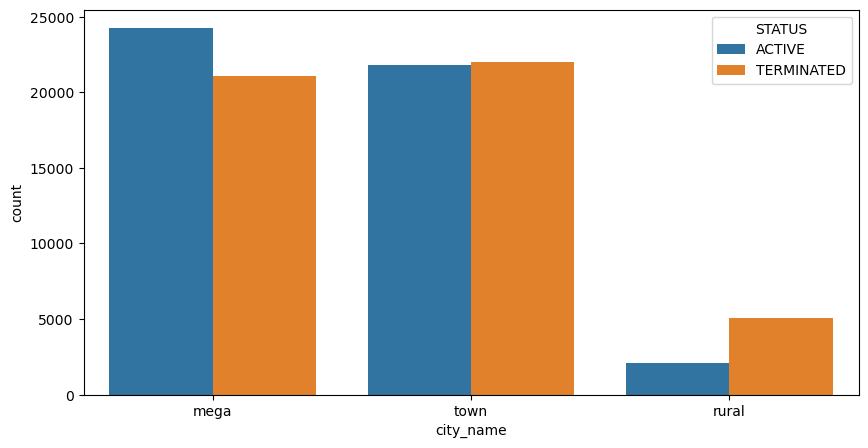

In [27]:
# Distribution of Status based on City Name
plt.figure(figsize=(10, 5))
sns.countplot(x="city_name", hue="STATUS", data=df_upsampled)

<Axes: xlabel='BUSINESS_UNIT', ylabel='count'>

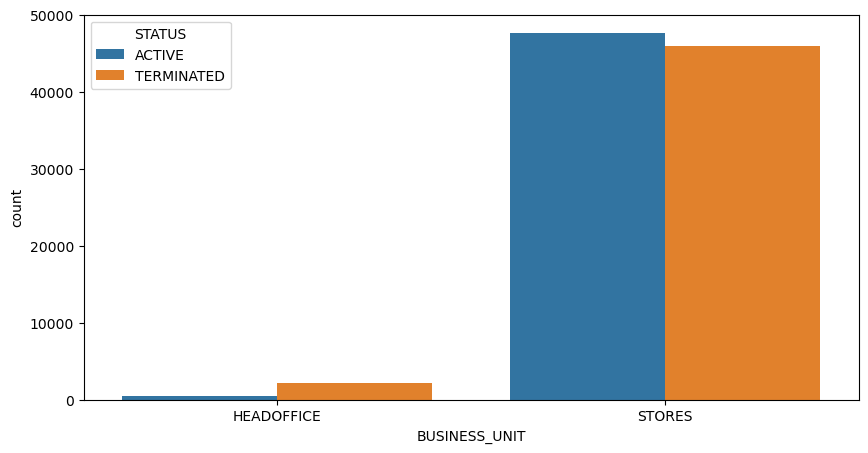

In [28]:
# Distribution of Status based on Business Unit
plt.figure(figsize=(10, 5))
sns.countplot(x="BUSINESS_UNIT", hue="STATUS", data=df_upsampled)

<Axes: xlabel='job_title', ylabel='count'>

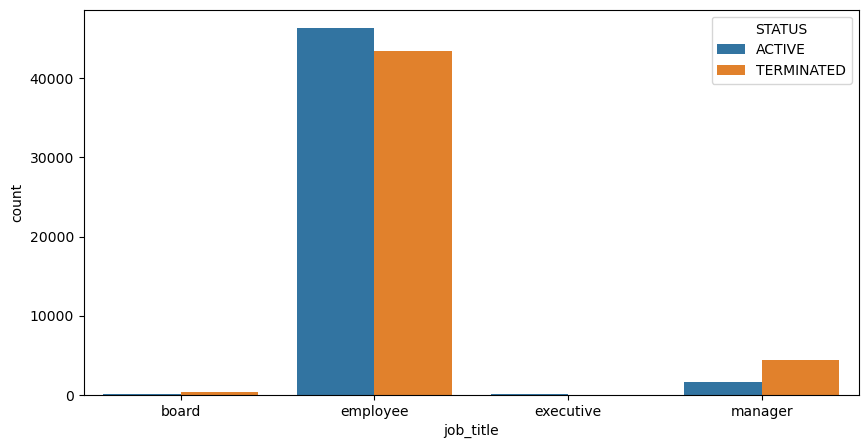

In [29]:
# Distribution of Status based on job title
plt.figure(figsize=(10, 5))
sns.countplot(x="job_title", hue="STATUS", data=df_upsampled)

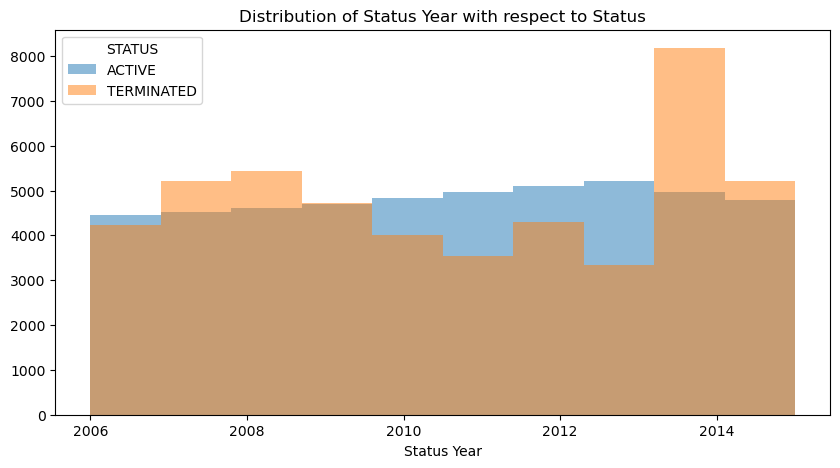

In [30]:
plt.figure(figsize=(10, 5))
plt.hist("STATUS_YEAR", data = df_upsampled[df_upsampled["STATUS"] == "ACTIVE"], alpha = 0.5, label = "ACTIVE")
plt.hist("STATUS_YEAR", data = df_upsampled[df_upsampled["STATUS"] == "TERMINATED"], alpha = 0.5, label = "TERMINATED")
plt.title("Distribution of Status Year with respect to Status")
plt.xlabel("Status Year")
plt.legend(title = "STATUS")
plt.show()

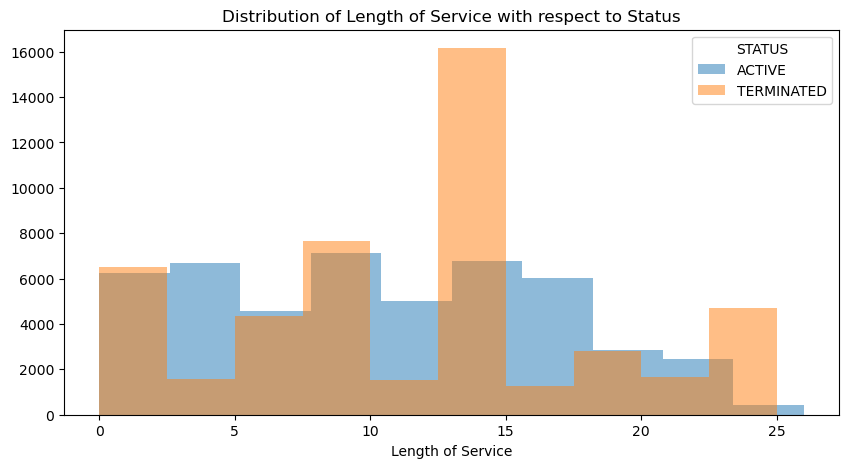

In [31]:
plt.figure(figsize=(10, 5))
plt.hist("length_of_service", data = df_upsampled[df_upsampled["STATUS"] == "ACTIVE"], alpha = 0.5, label = "ACTIVE")
plt.hist("length_of_service", data = df_upsampled[df_upsampled["STATUS"] == "TERMINATED"], alpha = 0.5, label = "TERMINATED")
plt.title("Distribution of Length of Service with respect to Status")
plt.xlabel("Length of Service")
plt.legend(title = "STATUS")
plt.show()

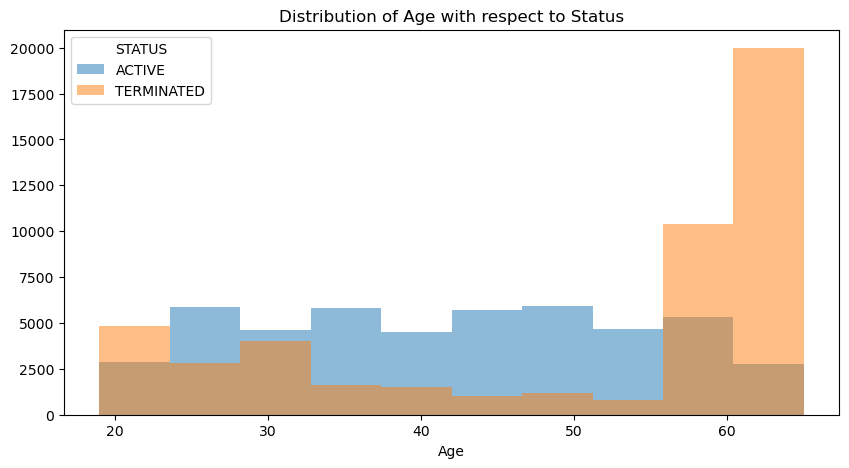

In [32]:
plt.figure(figsize=(10, 5))
plt.hist("age", data = df_upsampled[df_upsampled["STATUS"] == "ACTIVE"], alpha = 0.5, label = "ACTIVE")
plt.hist("age", data = df_upsampled[df_upsampled["STATUS"] == "TERMINATED"], alpha = 0.5, label = "TERMINATED")
plt.title("Distribution of Age with respect to Status")
plt.xlabel("Age")
plt.legend(title = "STATUS")
plt.show()

<Figure size 1000x500 with 0 Axes>

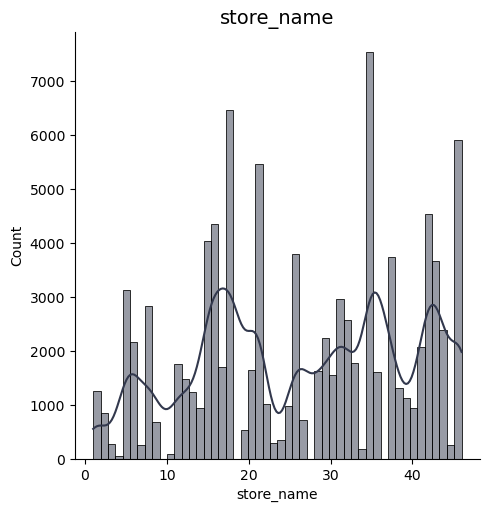

<Figure size 1000x500 with 0 Axes>

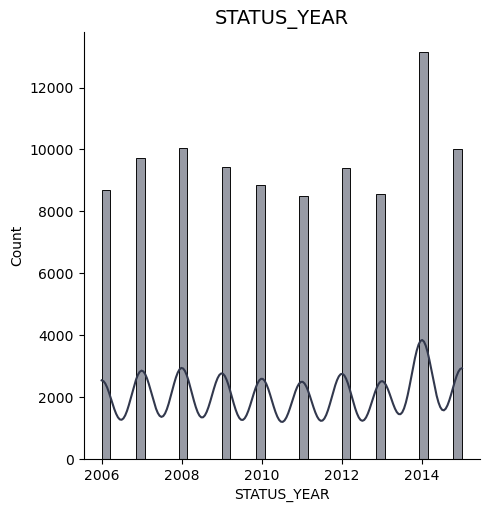

<Figure size 1000x500 with 0 Axes>

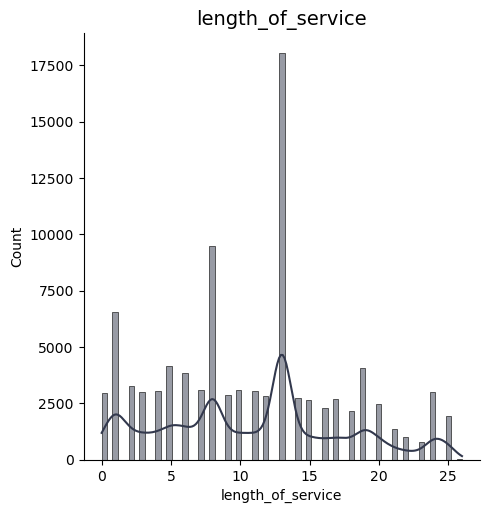

<Figure size 1000x500 with 0 Axes>

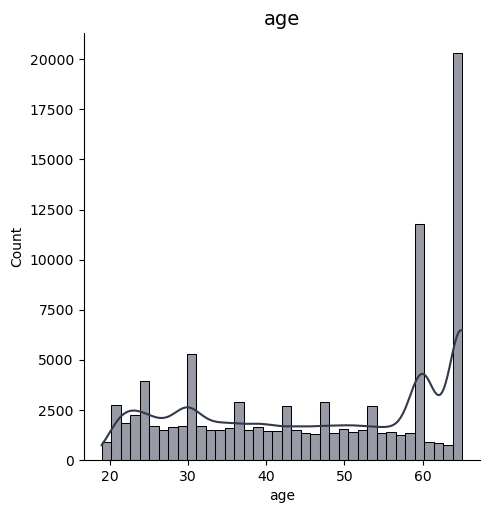

In [33]:
for column in ['store_name', 'STATUS_YEAR', 'length_of_service', 'age']:
    plt.figure(figsize=(10, 5))
    sns.displot(df_upsampled[column], color = '#32384D', label = 'terminated',  kde = True)
    plt.title(column, size = 14)

# Data preproc

In [34]:
df_upsampled.head()

,EmployeeID,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,8/28/1989,1/1/1900,52,17,mega,Executive,board,35,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,8/28/1989,1/1/1900,53,18,mega,Executive,board,35,M,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,8/28/1989,1/1/1900,54,19,mega,Executive,board,35,M,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,8/28/1989,1/1/1900,55,20,mega,Executive,board,35,M,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,8/28/1989,1/1/1900,56,21,mega,Executive,board,35,M,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [35]:
# City name
city_name_label = {value: key for key, value in enumerate(df_upsampled['city_name'].unique())}
df_upsampled['city_name'] = df_upsampled['city_name'].map(city_name_label)

In [36]:
# Department name
department_name_label = {value: key for key, value in enumerate(df_upsampled['department_name'].unique())}
df_upsampled['department_name'] = df_upsampled['department_name'].map(department_name_label)

In [37]:
# Job title
job_title_label = {value: key for key, value in enumerate(df_upsampled['job_title'].unique())}
df_upsampled['job_title'] = df_upsampled['job_title'].map(job_title_label)

In [38]:
# Gender
gender_short_label = {value: key for key, value in enumerate(df_upsampled['gender_short'].unique())}
df_upsampled['gender_short'] = df_upsampled['gender_short'].map(gender_short_label)

In [39]:
# Reason for termination
term_desc_label = {value: key for key, value in enumerate(df_upsampled['termreason_desc'].unique())}
df_upsampled['termreason_desc'] = df_upsampled['termreason_desc'].map(term_desc_label)

In [40]:
# Type of termination
termtype_desc_label = {value: key for key, value in enumerate(df_upsampled['termtype_desc'].unique())}
df_upsampled['termtype_desc'] = df_upsampled['termtype_desc'].map(termtype_desc_label)

In [41]:
# Status
status_label = {value: key for key, value in enumerate(df_upsampled['STATUS'].unique())}
df_upsampled['STATUS'] = df_upsampled['STATUS'].map(status_label)

In [42]:
# Business unit
business_label = {value: key for key, value in enumerate(df_upsampled['BUSINESS_UNIT'].unique())}
df_upsampled['BUSINESS_UNIT'] = df_upsampled['BUSINESS_UNIT'].map(business_label)

In [43]:
df_upsampled.head()

,EmployeeID,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,8/28/1989,1/1/1900,52,17,0,0,0,35,0,0,0,2006,0,0
1,1318,8/28/1989,1/1/1900,53,18,0,0,0,35,0,0,0,2007,0,0
2,1318,8/28/1989,1/1/1900,54,19,0,0,0,35,0,0,0,2008,0,0
3,1318,8/28/1989,1/1/1900,55,20,0,0,0,35,0,0,0,2009,0,0
4,1318,8/28/1989,1/1/1900,56,21,0,0,0,35,0,0,0,2010,0,0


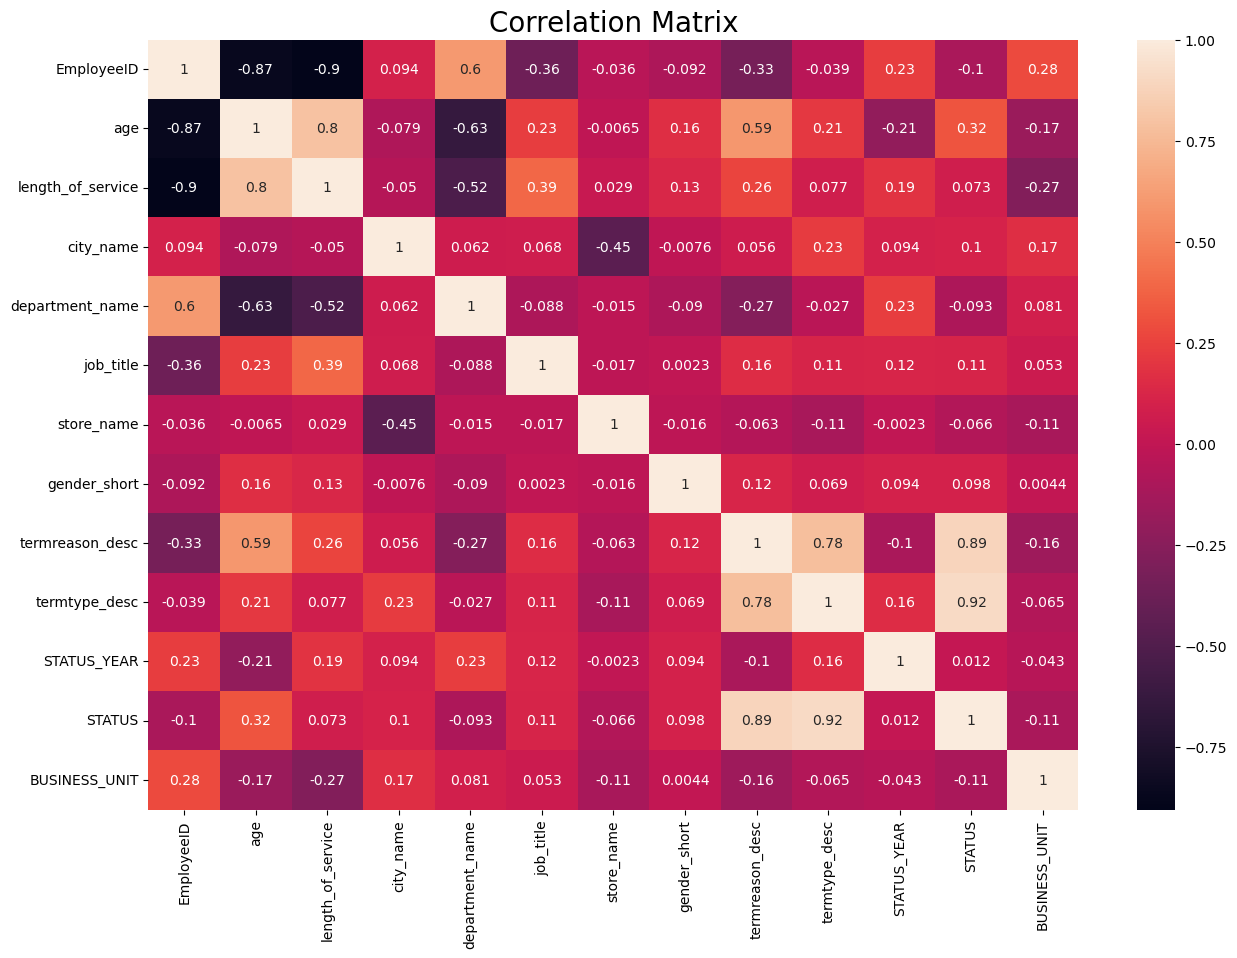

In [44]:
# Correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df_upsampled.corr(numeric_only=True), annot=True);
plt.title('Correlation Matrix', fontsize=20);

In [45]:
df_upsampled.corr(numeric_only=True)['STATUS'].sort_values(ascending=False)[1:]

termtype_desc        0.917547
termreason_desc      0.886604
age                  0.315872
job_title            0.109929
city_name            0.102445
gender_short         0.098114
length_of_service    0.072507
STATUS_YEAR          0.012100
store_name          -0.066467
department_name     -0.093282
EmployeeID          -0.104673
BUSINESS_UNIT       -0.105738
Name: STATUS, dtype: float64

In [46]:
# Dropping some columns
df_upsampled.drop(['termreason_desc', 'termtype_desc', 'orighiredate_key', 'terminationdate_key'], axis=1, inplace=True)

In [47]:
df_upsampled.head()

,EmployeeID,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,52,17,0,0,0,35,0,2006,0,0
1,1318,53,18,0,0,0,35,0,2007,0,0
2,1318,54,19,0,0,0,35,0,2008,0,0
3,1318,55,20,0,0,0,35,0,2009,0,0
4,1318,56,21,0,0,0,35,0,2010,0,0


## Classification

- Logistic Regression
- Random Forest Classifier

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score,roc_curve,auc

In [49]:
accuracy_list = []
f1_list = []
roc_auc_list = []

In [50]:
# Train test evalution
def result(X, y, ts, rs, model):
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=rs)
    
    # scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    y_train = y_train.values.ravel()
    
    # fit on data
    model.fit(X_train, y_train)
     #prediction
    pred = model.predict(X_test)
    
    # performance of model
    print("Classification Report: \n", classification_report(y_test, pred))
    print("-" * 100)
    print()
    
    # accuracy of model
    acc = accuracy_score(y_test, pred)
    accuracy_list.append(acc)
    print("Accuracy Score: ", acc)
    print("-" * 100)
    print()

    # f1-score of model
    f1 = f1_score(y_test, pred)
    f1_list.append(f1)
    print("F1 Score: ", f1)
    print("-" * 100)
    print()
    
     # roc-auc curve of model
    fpr,tpr,threshold = roc_curve(y_test,pred)
    auc_value = auc(fpr,tpr)
    rocauc_score = roc_auc_score(y_test, pred)
    roc_auc_list.append(rocauc_score)
    plt.figure(figsize=(5,5),dpi=100)
    print("ROC-AUC Score: ", f1)
    print("-" * 100)
    print()
    plt.plot(fpr,tpr,linestyle='-',label = "(auc_value = %0.3f)" % auc_value)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    print()
    
     # confusion matrix for model
    print("Confusion Matrix: ")
    plt.figure(figsize=(10, 5))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g');
    plt.title('Confusion Matrix', fontsize=20)

In [51]:
# Independent and dependent features
x = df_upsampled[['age', 'length_of_service', 'city_name', 'department_name', 'job_title', 'store_name', 'gender_short',
       'STATUS_YEAR', 'BUSINESS_UNIT']]
y = df_upsampled[['STATUS']]

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.87      0.81     12067
           1       0.85      0.73      0.78     12017

    accuracy                           0.80     24084
   macro avg       0.80      0.80      0.80     24084
weighted avg       0.80      0.80      0.80     24084

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.798538448762664
----------------------------------------------------------------------------------------------------

F1 Score:  0.7833541703875692
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.7833541703875692
----------------------------------------------------------------------------------------------------



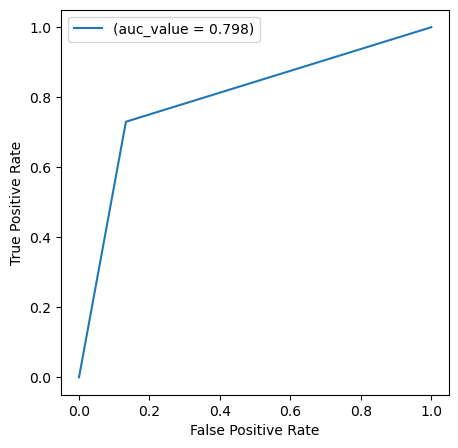


Confusion Matrix: 


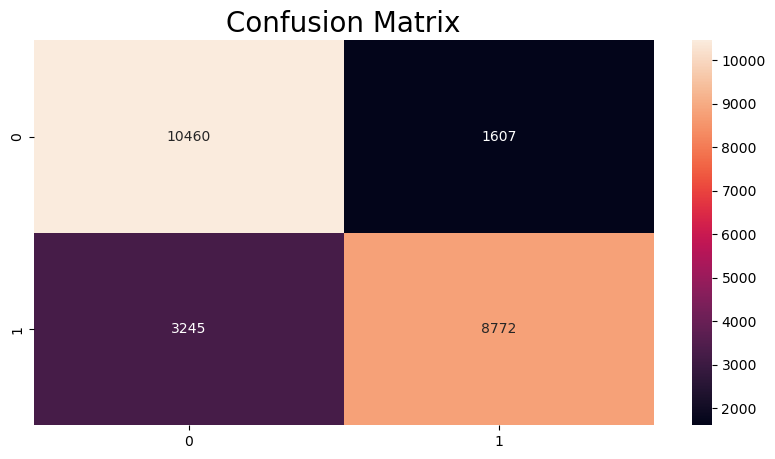

In [52]:
# Logistic regression
model = LogisticRegression()
result(x, y, 0.25, 42, model)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     12067
           1       0.98      1.00      0.99     12017

    accuracy                           0.99     24084
   macro avg       0.99      0.99      0.99     24084
weighted avg       0.99      0.99      0.99     24084

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9906576980568012
----------------------------------------------------------------------------------------------------

F1 Score:  0.9907250917185375
----------------------------------------------------------------------------------------------------

ROC-AUC Score:  0.9907250917185375
----------------------------------------------------------------------------------------------------



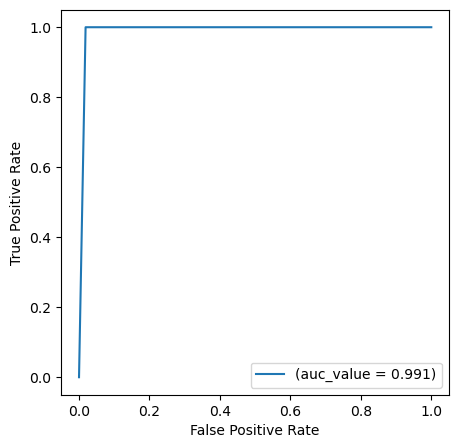


Confusion Matrix: 


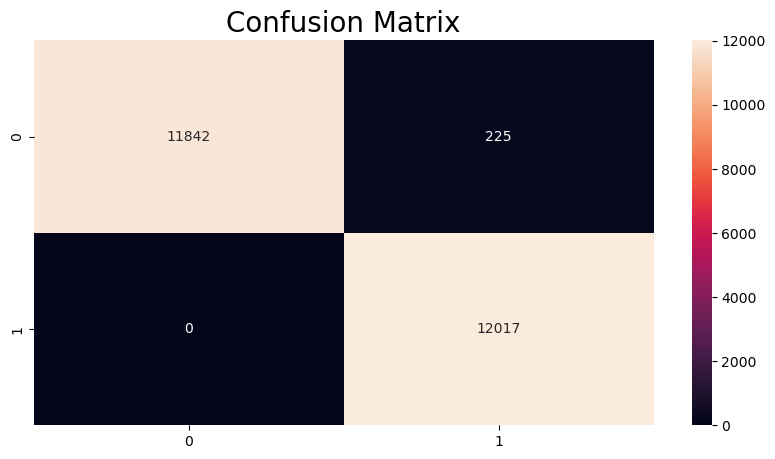

In [53]:
# Random forest
rf = RandomForestClassifier()
result(x, y, 0.25, 42, rf)

In [54]:
classifier_list = ["Logistic Regression", "Random Forest"]
list_class = []
for i in range(0, len(classifier_list)):
  listclass = [classifier_list[i], accuracy_list[i], f1_list[i], roc_auc_list[i]]
  list_class.append(listclass)

list_class

[['Logistic Regression',
  0.798538448762664,
  0.7833541703875692,
  0.7983963824514535],
 ['Random Forest', 0.9906576980568012, 0.9907250917185375, 0.9906770531200795]]

In [55]:
cc_table = pd.DataFrame(list_class, columns = ["Classifier", "Accuracy", "F1 Score", "ROC-AUC Score"])
cc_table.sort_values(ascending = False, by = "Accuracy")

,Classifier,Accuracy,F1 Score,ROC-AUC Score
1,Random Forest,0.990658,0.990725,0.990677
0,Logistic Regression,0.798538,0.783354,0.798396


<Axes: xlabel='Accuracy', ylabel='Classifier'>

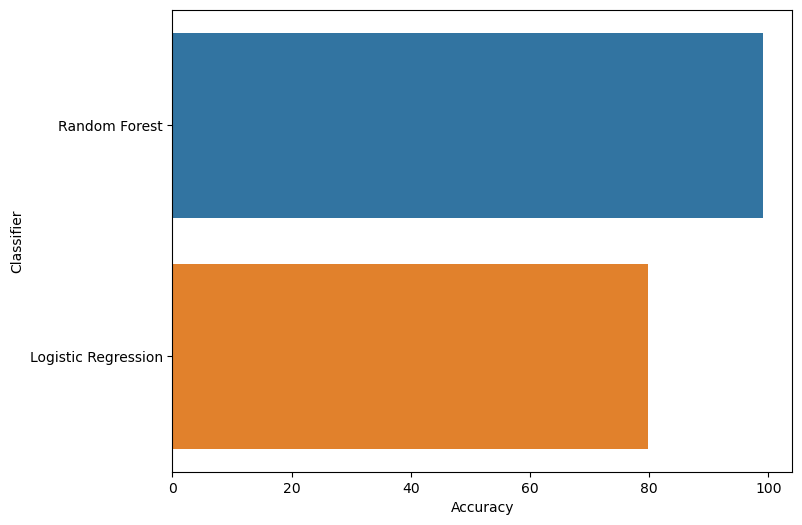

In [56]:
plt.figure(figsize = (8,6))
sns.barplot(x = cc_table["Accuracy"]*100, 
            y = cc_table["Classifier"], 
            data = cc_table, 
            order = cc_table.sort_values("Accuracy", ascending = False).Classifier)

<Axes: xlabel='F1 Score', ylabel='Classifier'>

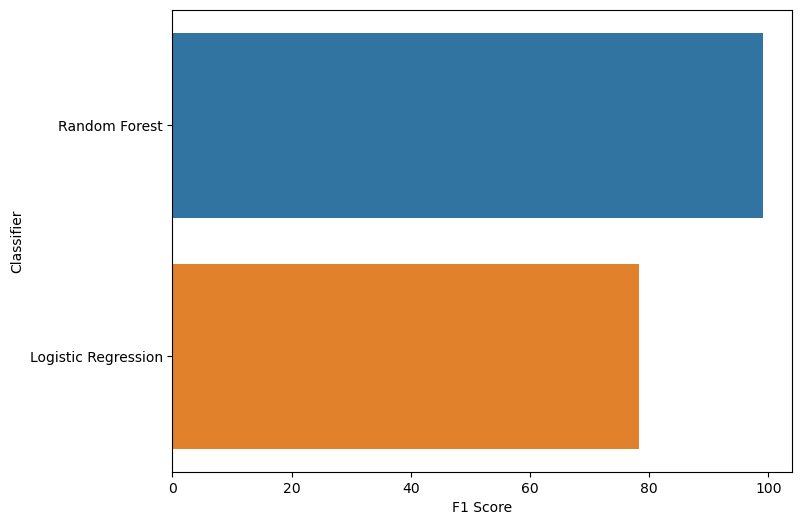

In [57]:
plt.figure(figsize = (8,6))
sns.barplot(x = cc_table["F1 Score"]*100, 
            y = cc_table["Classifier"], 
            data = cc_table, 
            order = cc_table.sort_values("F1 Score", ascending = False).Classifier)

<Axes: xlabel='ROC-AUC Score', ylabel='Classifier'>

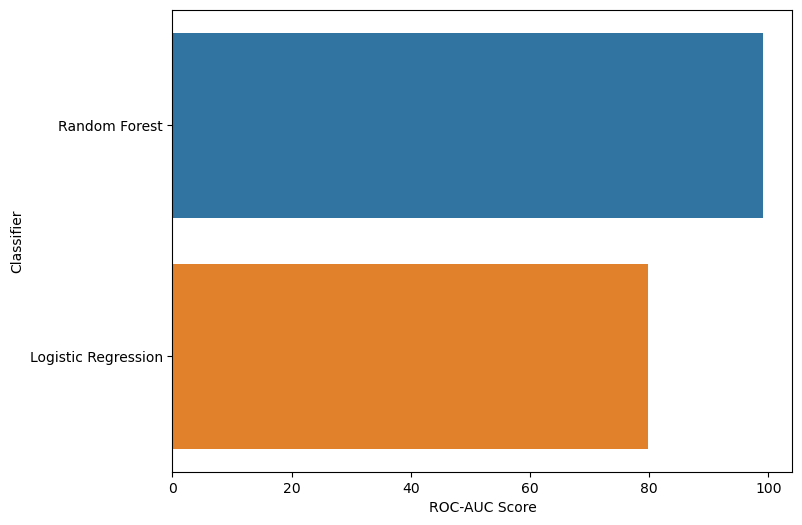

In [58]:
plt.figure(figsize = (8,6))
sns.barplot(x = cc_table["ROC-AUC Score"]*100, 
            y = cc_table["Classifier"], 
            data = cc_table, 
            order = cc_table.sort_values("ROC-AUC Score", ascending = False).Classifier)

## Predicting employee attrition

In [59]:
feature_columns = ['age', 'length_of_service', 'city_name', 'department_name', 'job_title', 
                   'store_name', 'gender_short', 'STATUS_YEAR', 'BUSINESS_UNIT']
employee_features = df_upsampled[df_upsampled['EmployeeID'] == 1318][feature_columns]

In [60]:
employee_features_array = employee_features.values
predicted_status = rf.predict(employee_features_array)
print(f"Prediction: {predicted_status[0]}")

Prediction: 1
